<a href="https://colab.research.google.com/github/RJuro/AS2021/blob/main/Stat_2020_reeksamen_opgave_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Anvendt Statisik - Re-eksamen 
### HA E2020

I denne opgave bliver i introduceret for Amerikanske huspriser, baseret på opslag fra den private salgsdatabase Craigslist

![](https://source.unsplash.com/C0OhW5_W6hw)

Notebook'en guider dig igennem opgaven. Priser fortolkes i amerikanske dollars ($). 

Dataset er baseret på datasæt fra http://kaggle.com/
uploadet i 2019.

In [1]:
# Importer de pakker der skal bruges til at besvare opgaven her
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x) # slukker for "scientific notation"

import seaborn as sns
sns.set()

data findes på digital eksamen - kan også hentes med link fra Github: https://github.com/SDS-AAU/IntroStat/raw/master/Data/housing_cleaned.csv

**Hvis der kommer fejl. Og du kommer ikke videre f.eks in DF er ubrugelig** Lad være med at gå i panik! Gem din notebook, (måske) genstart kernel, kør cellerne oppefra ned (I Colab: automatisk med "Runtime" --> "Run before"; Jupyter Lab "Run" --> "Run all above selected cell")

Besvarelser (tekst) skrives i felter med "Svar: ..." ikke som kommentar i kode-celler

**1**

In [2]:
# Indlæs data (housing_cleaned.csv)
df = pd.read_csv('https://github.com/SDS-AAU/IntroStat/raw/master/Data/housing_cleaned.csv')

In [3]:
# vis de første fem rækker af data
df.head()

,Unnamed: 0,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,31147,"washington, DC",1199,apartment,695,1,1.00000,1,1,1,0,0,0,laundry on site,off-street parking,dc
1,264722,columbia,905,apartment,950,2,2.00000,0,0,1,0,0,0,NaN,NaN,sc
2,169218,southeast missouri,700,house,1700,3,2.50000,1,0,0,0,0,0,w/d in unit,off-street parking,mo
3,268564,hilton head,1400,townhouse,1350,3,2.50000,0,0,0,0,0,0,w/d in unit,NaN,sc
4,105979,des moines,875,apartment,976,2,2.00000,1,1,1,0,0,0,w/d in unit,attached garage,ia


In [4]:
# vis information om variable og observationer i data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               25000 non-null  int64  
 1   region                   25000 non-null  object 
 2   price                    25000 non-null  int64  
 3   type                     25000 non-null  object 
 4   sqfeet                   25000 non-null  int64  
 5   beds                     25000 non-null  int64  
 6   baths                    25000 non-null  float64
 7   cats_allowed             25000 non-null  int64  
 8   dogs_allowed             25000 non-null  int64  
 9   smoking_allowed          25000 non-null  int64  
 10  wheelchair_access        25000 non-null  int64  
 11  electric_vehicle_charge  25000 non-null  int64  
 12  comes_furnished          25000 non-null  int64  
 13  laundry_options          19886 non-null  object 
 14  parking_options       

**2**

In [5]:
# giv et overblik over, hvor mange missing der er i hver variabel (med funktion, ikke udledt fra ovenstående)
df.isnull().sum()

Unnamed: 0                    0
region                        0
price                         0
type                          0
sqfeet                        0
beds                          0
baths                         0
cats_allowed                  0
dogs_allowed                  0
smoking_allowed               0
wheelchair_access             0
electric_vehicle_charge       0
comes_furnished               0
laundry_options            5114
parking_options            9098
state                         0
dtype: int64

**3**

In [6]:
# give et overblik over prisfordeling (min, max, median, std.afvigelse - 1 Pandas funktion) 
df.price.describe()

count      25000.00000
mean        1764.99220
std        65978.99022
min            0.00000
25%          801.00000
50%         1029.00000
75%         1399.00000
max     10321189.00000
Name: price, dtype: float64

**4**

In [7]:
# find den række med det dyreste hus/lejlighed. Det er nemmest ved at 
# Ud fra de informationer du har samlet indtil videre: Er det en sansynlig pris eller en fejl (f.eks. dataindsampling, stavefejl)?

df.loc[df['price'] == 10321189]

,Unnamed: 0,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
19132,15023,visalia-tulare,10321189,apartment,729,3,2.00000,0,0,0,0,0,0,laundry on site,carport,ca


Svar: ...

**5**

In [8]:
# Med udgangspunkt i "price", beskær datasættet til 99. percentil (99 ekskl.) - brug dette datasæt fremadrettet!!!
df = df[df.price < df.price.quantile(.99)]

**6**

In [9]:
# give et overblik over prisfordeling (min, max, median, std.afvigelse) i det afgrænsede datasæt for at sikre
# at ekstremværdier er ude

# Hvor mange observationer blev slettet fra dine data?

df.price.describe()

count   24749.00000
mean     1147.26555
std       500.06236
min         0.00000
25%       800.00000
50%      1025.00000
75%      1388.00000
max      3344.00000
Name: price, dtype: float64

Svar: ...

**7**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


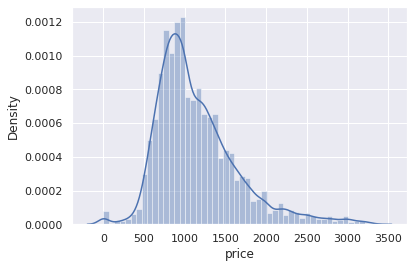

In [10]:
# Lav et histogram over prisfordelingen og redegør kort for hvad der kan aflæses.

sns.distplot(df.price)

Svar: ...

**8**

In [11]:
# Hvor mange forskellige typer udlejningsboliger findes der i data, og hvor mange observationer er der af hver? (brug variablen "type")
df['type'].value_counts() 

apartment          20474
house               2143
townhouse           1037
condo                373
duplex               324
manufactured         266
cottage/cabin         61
loft                  37
flat                  25
in-law                 8
assisted living        1
Name: type, dtype: int64

9

In [12]:
# Vis median for "price" grupperet på "type" 
# Hvilken type er det dyreste?  
df.groupby('type').price.median().sort_values(ascending=False)

type
flat              1304.00000
condo             1300.00000
loft              1190.00000
house             1180.00000
townhouse         1099.00000
cottage/cabin     1050.00000
duplex            1049.50000
apartment         1014.00000
in-law             995.00000
manufactured       899.00000
assisted living    175.00000
Name: price, dtype: float64

Svar: ...

10

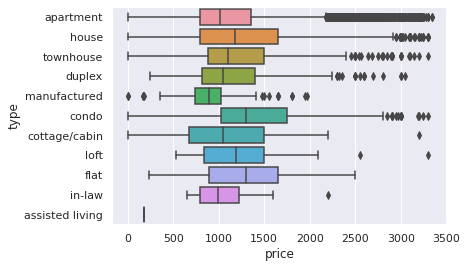

In [13]:
# lav et boxplot over den gennemsnitlige "price" fordelt på type
# Fortolk og samenlign "appartment" vs "house" ud fra boxplot for de 2 kategorier

sns.boxplot(data = df, x = "price", y = "type")

Svar: ...

11

In [14]:
# Filtrer igen datasættet, denne gang med udgangspunkt  i de 5 mest udbredte boligtyper (apartment, house, townhouse, condo, duplex)
# brug dette datasæt fremadrettet!!!
df = df[df['type'].isin(['apartment', 'house', 'townhouse', 'condo', 'duplex'])]

12

In [15]:
# Undersøg om boligerne er dyrere eller billigere hvis hunde er tilladt. 
# Brug krydstabulering på tværs af ovenstående filtrering, og aggreger median 
pd.crosstab(df['type'], df['dogs_allowed'], values=df['price'], aggfunc='median')

dogs_allowed,0,1
type,,
apartment,995,1022
condo,1400,1245
duplex,1000,1195
house,1200,1149
townhouse,1296,1050


In [16]:
#Undersøg ligeledes prisforskel ift. om katte er tilladte?
pd.crosstab(df['type'], df.cats_allowed, values=df.price, aggfunc='median')

cats_allowed,0,1
type,,
apartment,995,1020
condo,1400,1240
duplex,1000,1125
house,1250,1100
townhouse,1280,1050


13

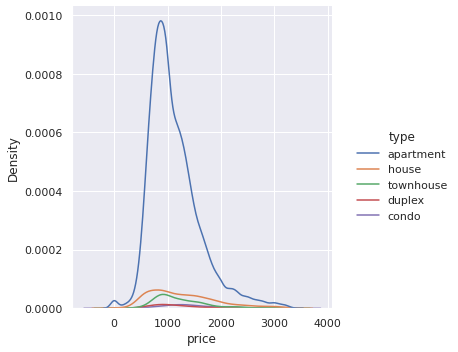

In [17]:
# Lav en "kernel density estimation" (kde) plot
# hvor der vises en farve-opdeling på forskellige "type"
# brug her seaborn's displot funktionen https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

sns.displot(data = df, x='price', hue='type', kind='kde')

14

In [18]:
# Vis og forklar den prismæssige standardafvigelse for "type" - hvordan passer det sammen med  hvad der kan ses i boxplot og KDE?
# Note: Sæt degrees of freedom til 0 (ddof=0)
df.groupby('type').price.std(ddof=0) 

type
apartment   477.20231
condo       613.66121
duplex      509.25652
house       637.68664
townhouse   492.61397
Name: price, dtype: float64

Svar: ...

15

In [19]:
# giv et overblik over hvor mange observationer der er i hver stat ('state')
df.state.value_counts()

fl    2021
ca    1941
tx    1912
nc    1176
ga     922
mi     898
oh     861
va     747
co     714
tn     706
pa     658
ny     622
il     614
sc     607
al     558
or     525
ks     525
ia     513
mn     485
md     464
wa     456
la     451
az     425
wi     404
in     386
nj     381
ok     368
ky     347
ut     325
ma     321
ms     303
id     298
nd     263
ct     262
ar     190
nm     179
ne     165
nv     154
dc     152
ak     133
sd     128
mo     127
de     126
ri     110
nh     109
hi     106
mt      99
wv      45
vt      30
me      26
wy      13
Name: state, dtype: int64

16

In [20]:
# Generer et datasæt "df_florida", hvor der kun er observationer fra staten florida ('fl')
df_florida = df.loc[df['state'] == 'fl']

In [21]:
# Tjek hvor mange regioner der er i Florida, samt hvor mange observationer der er i hver
df_florida.region.value_counts()

jacksonville             183
sarasota-bradenton       183
orlando                  174
space coast              173
daytona beach            148
tampa bay area           145
ft myers / SW florida    138
tallahassee              134
lakeland                 128
panama city              110
gainesville              103
treasure coast           100
pensacola                 87
south florida             79
okaloosa / walton         61
ocala                     30
florida keys              22
st augustine              12
heartland florida         11
Name: region, dtype: int64

17

In [22]:
# Lav en oversigt over gennemsnitsprisen for hver region i Florida, og sorter fra højeste til laveste pris 
df_florida.groupby('region').price.mean().sort_values(ascending=False)

region
florida keys            2213.27273
south florida           1862.75949
st augustine            1403.66667
treasure coast          1392.88000
sarasota-bradenton      1367.36612
orlando                 1319.66092
okaloosa / walton       1303.40984
panama city             1274.70909
ft myers / SW florida   1264.87681
tampa bay area          1229.31034
space coast             1192.16763
gainesville             1097.85437
jacksonville            1089.00546
daytona beach           1063.07432
lakeland                1048.35938
heartland florida        989.81818
tallahassee              977.59701
pensacola                951.33333
ocala                    913.20000
Name: price, dtype: float64

18

In [23]:
#Find ud af om prisen korrelerer med boligstørrelsen ('sqfeet') for hele datasættet df_florida 
df_florida.price.corr(df_florida.sqfeet)

0.186568469083378

19

In [24]:
# lav et afgrænset datasæt "df_jv", med observationer fra regionen Jacksonville, Florida 
df_jv = df.loc[(df['region'] == 'jacksonville') & (df['state'] == 'fl')]

20

In [25]:
#Tjek korrelationen mellem pris og boligstørrelse i Jacksonville, Florida
# Forklar/fortolk forskellen i de to korrelationsberegninger (Florida vs Jacksonville)

df_jv.price.corr(df_jv.sqfeet)

0.600643123515491

Svar: ...

21

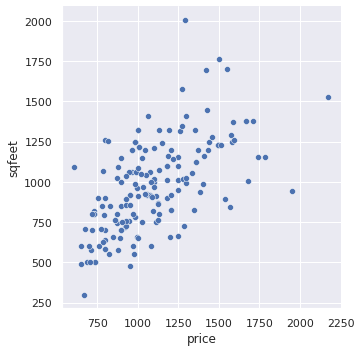

In [26]:
# visualiser, ved hjælp af et scatterplot (seaborn relplot), sammenhængen mellem "price" og "sqfeet" i Jacksonville, Florida
sns.relplot(x="price", y="sqfeet", data=df_jv)

Den følgende del ser på priser og kriminalitet. Her bruger vi et datasæt med kriminalitetsstatistik fra US storbyer. Disse data skal aggregeres med huspris-datasættet på delstatsniveau. Derafter fortager vi korrelationsberegninger for at se, om prisniveauet korrelerer med kriminalitet.

Data kan indlæses fra github: https://github.com/SDS-AAU/IntroStat/raw/master/Data/crime_per_city.csv

22

In [29]:
# Indlæs data crime_per_city.csv
crime = pd.read_csv('https://github.com/SDS-AAU/IntroStat/raw/master/Data/crime_per_city.csv')

23

In [30]:
# beregn gennemsnitsværdier for 'Burglary','Violent Crime' på delstatsniveau ('state_abbr') som ny DataFrame crime_state
# 'state_abbr' bliver index i denne DataFrame
crime_state = crime.groupby('state_abbr')['Burglary','Violent Crime'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


24

In [31]:
# Generér et merget datasæt "price_n_crime" ud fra "df" og "crime_state".
# aggreger huspriser og data om gennemsnitlig kriminalitet på delstatsstatsniveau (brug left_on='state', right_index = True som nøgle)
price_n_crime = pd.merge(df, crime_state, left_on='state', right_index= True)

25

In [32]:
# brug price_n_crime DataFrame: beregn og fortolk korrelation for priser vs gennemsnitlige niveauer for indbrudstyveri (burglary)
price_n_crime.price.corr(price_n_crime['Burglary'])

-0.2851400722706193

Svar: ...